<a href="https://colab.research.google.com/github/Sanaullah-khaskheli/NLP/blob/main/Introduction_to_NLP_CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter1 NLP
In this chapter we are going to use data analysis on Spam HAM on SMS dataset available at https://archive.ics.uci.edu/dataset/228/sms+spam+collection


#Importing Libraries

In [ ]:
import pandas as pd


And then, we use the read_csv() function for loading in the data. We pass into this function the URL in which the data can be found. To make it easier to work with the data in the future, we will name it by assigning it to a variable (digits in this case).

Note: we use "header = None" here so that the first row of our data will not be interpreted as the column names of the data frame.

In [ ]:
sms = pd.read_table('/content/SMSSpamCollection', header=None)

In [ ]:
print(sms)

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In order to see what data we loaded in, we can simply do this below:

In [6]:
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
y = sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [10]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [14]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
raw_text=sms[1]

In [16]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object

**Checking if there is any null values**

In [17]:
pd.isnull(sms)

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


#Data Visualization

**Importing Libraries**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

There are a couple basic visualizations we can do. The first is displaying the length of all the dataset instances. To do this, we must first label the columns with their appropriate titles and add a column to the dataset that contains the length.

In [19]:
sms.columns=['label', 'msg']

In [20]:
sms.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
sms['length'] = sms["msg"].apply(len)

In [22]:
sms.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Now we will use distplot of seaborn library to visualize the length of sms**

The distplot function in the Seaborn (often abbreviated as sns) data visualization library is used to plot univariate distributions of a dataset. It combines the functionality of a histogram with a kernel density estimate (KDE) plot, allowing you to visualize the distribution of a continuous variable.

<ipython-input-23-0fe10e2d0a99>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sms['length'], kde=False)


<Axes: xlabel='length'>

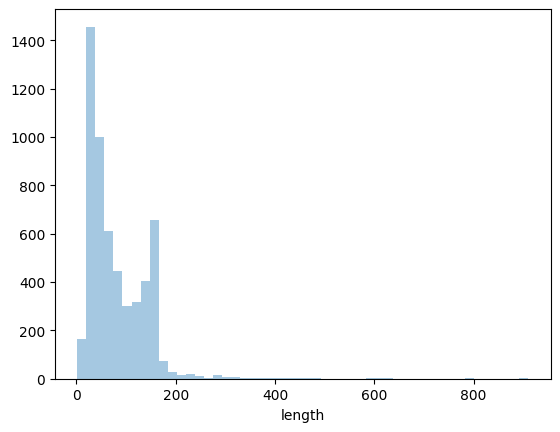

In [23]:
sns.distplot(sms['length'], kde=False)

References:
- https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
- https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

#Preprocessing

There are many feature engineering strategies for transforming text data into features. Some involve assigning each unique word-like term to a feature and counting the number of occurrences per training example. However, if we were to perform this strategy right now, we'd end up with an absurd number of features, a result of the myriad possible terms. The classifier would take too long to train and likely overfit. As a result, each NLP problem requires a tailored approach to determine which terms are relevant and meaningful, and this is where we begin our pre-processing.

### Step 1: Contraction Mapping / Expanding Contractions

Contractions are words that we write with an apostrophe. Examples of contractions are words like “ain’t” or “aren’t”. Since we want to standardize our text, it makes sense to expand these contractions. We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the "msg" field which will expand any contractions.

First, we install and import the necessary library - contractions.

In [26]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.8 MB/s eta 0:00:00


In [27]:
#importing library
import contractions as cns

In [28]:
sms['no_cont'] = sms['msg'].apply(lambda x: [cns.fix(word) for word in x.split()])

In [29]:
sms.head()

,label,msg,length,no_cont
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he..."


Also, we would want the expanded contractions to be tokenized separately, therefore we convert the lists under the "no_contract" column back into strings

In [31]:
sms['msg_str'] = [' '.join(map(str, l )) for l in sms['no_cont']]

In [32]:
sms.head()

,label,msg,length,no_cont,msg_str
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar..."


Reference: https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

#Step 2: Tokenization

In this step, we construct the features. We will begin by breaking apart the corpus into a vocabulary of unique terms, and this is called tokanization.

We can tokenize individual terms and generate what's called a bag of words model. You may notice this model has a glaring pitfall: it fails to capture the innate structure of human language. We can also tokenize using nltk, which is the leading platform for building Python programs to work with human language data.

We will begin my installing and importing nltk, so we can use it!

In [33]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [34]:
from nltk.tokenize import word_tokenize

**Lets take a simple example to demonstrate how tokenization works**

In [38]:
text = "Hi, I am here to demonstrate tokenization.!"

In [39]:
print(word_tokenize(text))

['Hi', ',', 'I', 'am', 'here', 'to', 'demonstrate', 'tokenization', '.', '!']


Now lets apply on our dataset

In [40]:
sms['tokenization'] = sms['msg_str'].apply(word_tokenize)

In [41]:
sms.head()

,label,msg,length,no_cont,msg_str,tokenization
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


Reference: https://www.guru99.com/tokenize-words-sentences-nltk.html

### Step 3: Noise Cleaning - spacing, special characters, lowercasing


Let'a take a small step back and examine a few random examples of SMS messages from our dataset.

In [42]:
sms.sample(frac=0.05) #frac=0.05 means we are taking only 5 percent of our dataset


,label,msg,length,no_cont,msg_str,tokenization
2098,ham,Are you the cutest girl in the world or what,44,"[Are, you, the, cutest, girl, in, the, world, ...",Are you the cutest girl in the world or what,"[Are, you, the, cutest, girl, in, the, world, ..."
8,spam,WINNER!! As a valued network customer you have...,157,"[WINNER!!, As, a, valued, network, customer, y...",WINNER!! As a valued network customer you have...,"[WINNER, !, !, As, a, valued, network, custome..."
5539,ham,Just sleeping..and surfing,26,"[Just, sleeping..and, surfing]",Just sleeping..and surfing,"[Just, sleeping, .., and, surfing]"
3114,ham,"Wat time liao, where still got.",31,"[Wat, time, liao,, where, still, got.]","Wat time liao, where still got.","[Wat, time, liao, ,, where, still, got, .]"
129,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...,107,"[HEY, GIRL., HOW, R, YOU?, HOPE, YOU, R, WELL,...",HEY GIRL. HOW R YOU? HOPE YOU R WELL ME AN DEL...,"[HEY, GIRL, ., HOW, R, YOU, ?, HOPE, YOU, R, W..."
...,...,...,...,...,...,...
1035,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,103,"[ZOE, IT, JUST, HIT, ME, 2, I AM, FUCKING, SHI...",ZOE IT JUST HIT ME 2 I AM FUCKING SHITIN MYSEL...,"[ZOE, IT, JUST, HIT, ME, 2, I, AM, FUCKING, SH..."
785,ham,Dont think so. It turns off like randomlly wit...,65,"[Do Not, think, so., It, turns, off, like, ran...",Do Not think so. It turns off like randomlly w...,"[Do, Not, think, so, ., It, turns, off, like, ..."
3640,ham,Wat's da model num of ur phone?,31,"[Wat's, da, model, num, of, you are, phone?]",Wat's da model num of you are phone?,"[Wat, 's, da, model, num, of, you, are, phone, ?]"
1614,ham,Thnx dude. u guys out 2nite?,28,"[Thnx, dude., you, guys, out, 2nite?]",Thnx dude. you guys out 2nite?,"[Thnx, dude, ., you, guys, out, 2nite, ?]"


Clearly there's a lot going on here: digits, gratuitous whitespace, and all varieties of punctuation. Some terms are randomly capitalized, others are in all-caps. Since these terms might show up in any one of the training examples in countless forms, we need a way to ensure each training example is on equal footing via a preprocessing step called normalization. This form of noise cleaning takes care of spacing and any special characters.

Transforming all words to lowercase is also a very common pre-processing step. In this case, we will once again append a new column named “lower” to the dataframe which will transform all the tokenized words into lowercase. However, because we have to iterate over multiple words we will use a simple for-loop within a lambda function to apply the “lower” function to each word.

In [43]:
sms['lower'] = sms['tokenization'].apply(lambda x: [word.lower() for word in x])
sms.head()

,label,msg,length,no_cont,msg_str,tokenization,lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,..."


Next, we'll remove all punctuation since they serve little value once we begin to analyze our data. Continuing the previous pattern, we will create a new column which has the punctuation removed. We will again utilize a for-loop within a lambda function to iterate over the tokens but this time using an IF condition to only output alpha character

In [45]:
import string
pun = string.punctuation
sms['no_Punct'] = sms['lower'].apply(lambda x: [word for word in x if word not in pun])
sms.head()

,label,msg,length,no_cont,msg_str,tokenization,lower,no_Punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he..."


###Step 4: Spell Checking

For spell checking, we will use Microsoft's TextBlob, which is a simple spelling correction mechanism. You can install this using the command below:

In [46]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.8 MB/s eta 0:00:00


We will first demonstrate a simple example how we implement this spellchecker and how it is able to not only identify misspelled words, but also suggest the most likely corrected spelling along with other likely options.

In [48]:
from spellchecker import SpellChecker

spell = SpellChecker()

#find word that may be misspelled

misspelled  = spell.unknown(['I', 'am', 'not', 'goin', 'aniwhere'])

for word in misspelled:
  print(spell.correction(word))

  print(spell.candidates(word))

going
{'foin', 'goon', 'gown', 'grin', 'join', 'gain', 'going', 'groin', 'coin', 'gin', 'loin'}
anywhere
{'anywhere'}


Reference: https://pypi.org/project/pyspellchecker/

##Step 5: "Stop Word" identification

In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [52]:
sms['SW_removed'] = sms['no_Punct'].apply(lambda x: [word for word in x if word not in stop_words])

sms.head()

,label,msg,length,no_cont,msg_str,tokenization,lower,no_Punct,SW_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl...","[go, jurong, point, crazy, .., available, bugi..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[YOU, dun, say, so, early, hor..., YOU, c, alr...",YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"
